## Loan Approval Prediction using K Means Clustering and Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance


In [2]:
# Load the data
train_df = pd.read_csv('Training Dataset.csv')
test_df = pd.read_csv('Test Dataset.csv')

In [3]:
# Fill missing values in the training dataset
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)


In [4]:
# Fill missing values in the test dataset
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)


In [5]:
# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])


In [6]:
# Drop 'Loan_ID' as it is not relevant for prediction
X = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_df['Loan_Status']


In [7]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
train_df['Cluster'] = kmeans.fit_predict(X_scaled)


In [9]:
# Add cluster information to the features
X['Cluster'] = train_df['Cluster']


In [10]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

c:\Users\gupta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [12]:
# Predict on the validation set
y_pred = model.predict(X_val)


In [13]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [14]:
# Prepare the test dataset for prediction
test_df_encoded = test_df.copy()
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    test_df_encoded[col] = encoder.fit_transform(test_df_encoded[col])


In [15]:
# Standardize the test dataset
test_scaled = scaler.transform(test_df_encoded.drop('Loan_ID', axis=1))


In [16]:
# Predict clusters for the test data
test_df['Cluster'] = kmeans.predict(test_scaled)


In [17]:
# Add cluster information to the features
test_df_encoded['Cluster'] = test_df['Cluster']


In [18]:
# Predict loan approval for the test data
test_predictions = model.predict(test_df_encoded.drop('Loan_ID', axis=1))


In [19]:
# Add predictions to the test dataset
test_df['Loan_Status'] = test_predictions


In [20]:
# Convert predictions back to original labels
test_df['Loan_Status'] = encoder.inverse_transform(test_df['Loan_Status'])


In [21]:
# Save the predictions to a CSV file
test_df[['Loan_ID', 'Loan_Status']].to_csv('Loan_Predictions.csv', index=False)

print("Predictions saved to Loan_Predictions.csv")


Predictions saved to Loan_Predictions.csv


In [22]:
# Feature Importance using Permutation Importance
result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

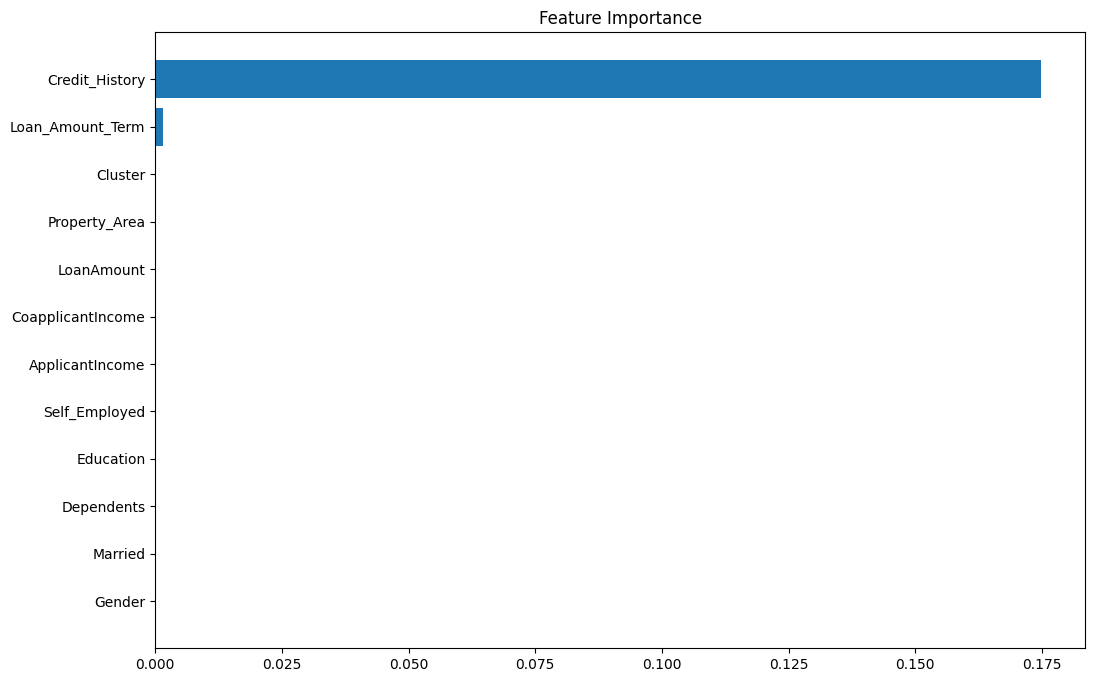

In [23]:
# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

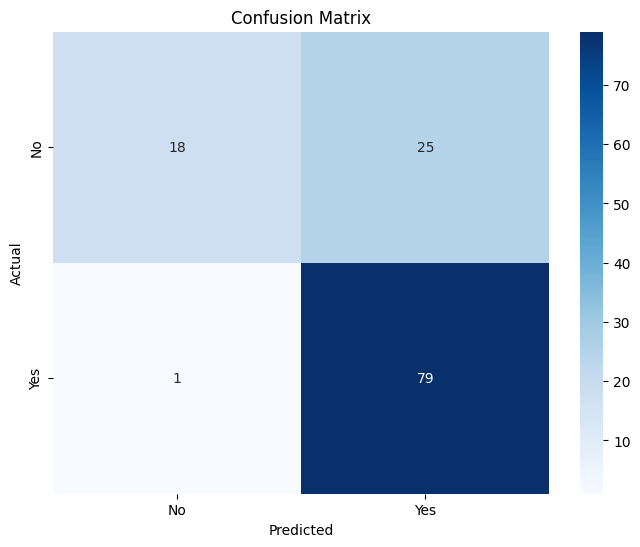

In [24]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()